<a href="https://colab.research.google.com/github/Daren-Stoev/Machine-Learning-projects/blob/main/Brain_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and editing the data


Importing most important libraries and the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
brainstrokes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BrainStroke.csv")

In [ ]:
print(brainstrokes.head())

In [ ]:
print(brainstrokes.describe())

Checking What we have to look for in the results

In [5]:
print("Target labels", brainstrokes["stroke"].unique())

Target labels [1 0]


Replacing the null cells with 0

In [ ]:
brainstrokes = pd.get_dummies(brainstrokes, dummy_na=True)
brainstrokes.shape
brainstrokes = brainstrokes.replace(0,0.0)
brainstrokes

Visualizing the dataset

In [ ]:
import plotly.express as px
fig = px.scatter(brainstrokes, x="age", y="bmi", color="stroke")
fig.show()

Normalizing the data

In [8]:
numeric_features = brainstrokes.dtypes[brainstrokes.dtypes != 'object'].index
df = brainstrokes[numeric_features]
normalized_df=(df-df.min())/(df.max()-df.min())


In [ ]:
brainstrokes[numeric_features] = normalized_df
brainstrokes[numeric_features] = brainstrokes[numeric_features].fillna(0.0)

brainstrokes

Getting the training data,test data, validation data and the labels

In [10]:
x = brainstrokes.drop("stroke", axis = 1)
y = brainstrokes["stroke"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=8)

print('Samples in Train Set:', len(x_train))
print('Samples in Validation Set:', len(x_val))
print('Samples in Test Set:', len(x_test))

Samples in Train Set: 3984
Samples in Validation Set: 498
Samples in Test Set: 499


Balancing the data in order for the model to not get too influenced

In [12]:
from imblearn.over_sampling import SMOTE #balance classes
sm = SMOTE(random_state=8)

#create new training set with SMOTE object
x_bal, y_bal = sm.fit_resample(x_train, y_train)

#Displays perccent of each class
print('Initial Dataset')
print('Percent "stroke":', y_train.sum()/len(y_train))
print('Balanced Dataset')
print('Percent "stroke":', y_bal.sum()/len(y_bal))

Initial Dataset
Percent "stroke": 0.04969879518072289
Balanced Dataset
Percent "stroke": 0.5


Adding an array in which we put different models' accuraccy

In [230]:
models_accuracy = []
models_recall = []
models_precision = []

# KNN model

Creating the model and assigning the number of neighbours

In [307]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Testing the model

In [309]:
prediction = knn.predict(x_test)
predictionChance = knn.predict_proba(x_test)
print("Prediction: {}".format(predictionChance))
print("Prediction: {}".format(prediction))

Prediction: [[1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]
Prediction: [0. 0. 0. ... 0. 0. 0.]


In [310]:
knn_acc = accuracy_score(y_test,knn.predict(x_test))*100
knn_acc

95.58528428093645

In [ ]:
models_recall.append(recall_score(y_test,knn.predict(x_test))*100)
models_precision.append(precision_score(y_test,knn.predict(x_test))*100)
models_accuracy.append(knn_acc*100)

In [232]:
models_recall
models_precision

[40.0]

# Neural Network with TensorFlow

In [76]:
import tensorflow as tf
import keras as keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


Creating a custom model

In [77]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(25, activation=tf.nn.relu)
    #self.dense2 = tf.keras.layers.Dense(1, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(256, activation=tf.nn.sigmoid)
    self.dense4 = tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)
    self.dense5 = tf.keras.layers.Dense(64, activation=tf.nn.sigmoid)
    self.dense6 = tf.keras.layers.Dense(32, activation=tf.nn.sigmoid)
    self.dense7 = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

  def call(self, inputs):
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.dense4(x)
    x = self.dense5(x)
    x = self.dense6(x)
    x = self.dense7(x)
    return x

Training the model

In [ ]:
model2 = MyModel()
epoch_number = 512
model2.compile(loss = 'BinaryCrossentropy',optimizer = Adam(lr = 0.00003), metrics = ['accuracy'])
history2 = model2.fit(x_bal,y_bal,epochs = epoch_number,validation_data=(x_val, y_val), verbose = 1)

In [79]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
nnPred = model2.predict(x_test)
print(nnPred)


Checking the accuracy of the model

Test Set Metrics
Model Accuracy: 0.7478260869565218
Model Recall: 0.5538461538461539
Model Precision: 0.09375


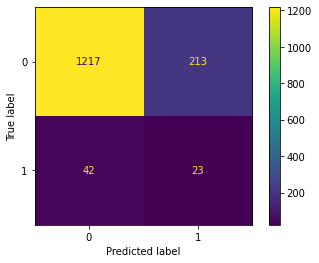

In [233]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred=[]
for i in model2.predict(x_test):
    if i>0.8:
        y_pred.append(1)
    if i<0.8:
        y_pred.append(0)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
cm.plot()
#print(confusion_matrix(y_test,y_pred))


from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score#evaluate model
threshold = 0.5
test_preds = [1. if i > threshold else 0. for i in nnPred]
test_acc = accuracy_score(y_test, test_preds)
test_rec = recall_score(y_test, test_preds)
test_pre = precision_score(y_test, test_preds)
models_accuracy.append(test_acc*100)
models_recall.append(test_rec*100)
models_precision.append(test_pre*100)
print('Test Set Metrics')
print('Model Accuracy:', test_acc)
print('Model Recall:', test_rec)
print('Model Precision:', test_pre)

Visalizing the loss of the training

In [82]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7478260869565218

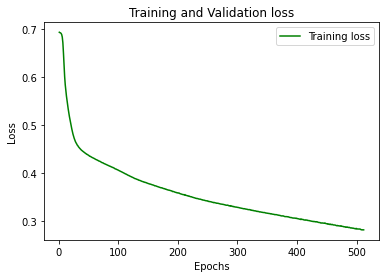

In [100]:
import matplotlib.pyplot as plt

loss_train = history2.history['loss']
epochs = range(1,epoch_number+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Linear regression


In [44]:
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
brainstrokes_x = brainstrokes
brainstrokes_x_train = brainstrokes_x[:-900]
brainstrokes_x_test = brainstrokes_x[-900:]
brainstrokes_age_train = brainstrokes_x["age"][:-900]
brainstrokes_age_test = brainstrokes_x["age"][-900:]
brainstrokes_y_train = brainstrokes["stroke"][:-900]
brainstrokes_y_test = brainstrokes["stroke"][-900:]

In [46]:
brainstrokes_x.shape

(4981, 25)

In [47]:
brainstrokes_x_train.shape

(4081, 25)

In [53]:
regr = linear_model.LinearRegression()
regr.fit(brainstrokes_x_train,brainstrokes_y_train)

LinearRegression()

In [49]:
brainstrokes_y_predict = regr.predict(brainstrokes_x_test)
regr.coef_

array([ 0.00000000e+00, -1.24900090e-16, -1.15453712e-16,  6.66805095e-16,
       -2.61428744e-16,  1.00000000e+00,  1.52116449e-04,  1.52116449e-04,
        1.07439951e-05, -2.09882912e-05, -2.09882912e-05, -6.20511693e-05,
        6.46409219e-04,  6.46409219e-04,  6.46409219e-04,  6.46409219e-04,
        3.46944695e-18,  2.20061689e-02,  2.20061689e-02,  0.00000000e+00,
       -2.62898432e-03, -2.62898432e-03, -2.62898432e-03, -2.62898432e-03,
        0.00000000e+00])

In [52]:
mean_squared_error(brainstrokes_y_test,brainstrokes_y_predict)

4.502240947443505e-31

In [51]:
r2_score(brainstrokes_y_test,brainstrokes_y_predict)

1.0

In [105]:
brainstrokes_y_test.shape

(900,)

ValueError: ignored

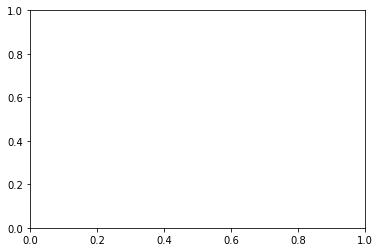

In [119]:
plt.scatter(brainstrokes_x_test,brainstrokes_y_test,color = "black")
plt.plot(brainstrokes_x_test, brainstrokes_y_predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Decision Tree

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 8, max_depth = 3,
                                  min_samples_leaf=5)
clf_gini.fit(x_train,y_train)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 8,
                                     max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(x_train,y_train)

In [ ]:
gini_y_predict = clf_gini.predict(x_test)
models_accuracy.append(accuracy_score(y_test,gini_y_predict)*100)
models_recall.append(recall_score(y_test,gini_y_predict)*100)
models_precision.append(precision_score(y_test,gini_y_predict)*100)
print(confusion_matrix(y_test,gini_y_predict))
print(accuracy_score(y_test,gini_y_predict)*100)
print(classification_report(y_test,gini_y_predict))


In [ ]:
entropy_y_predict = clf_entropy.predict(x_test)
models_accuracy.append(accuracy_score(y_test,entropy_y_predict)*100)
models_recall.append(recall_score(y_test,entropy_y_predict)*100)
models_precision.append(precision_score(y_test,entropy_y_predict)*100)
print(confusion_matrix(y_test,entropy_y_predict))
print(accuracy_score(y_test,entropy_y_predict)*100)
print(classification_report(y_test,entropy_y_predict))

# Support Vector Machine (SVM)

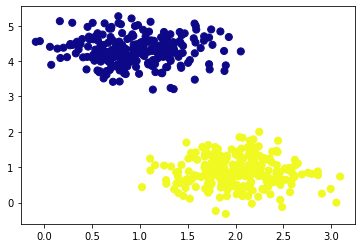

In [62]:
from sklearn.datasets import make_blobs
m,n=make_blobs(n_samples=500,centers=2,
           random_state=0,cluster_std=0.40)
plt.scatter(m[:,0],m[:,1],c=n,s=50,cmap='plasma')

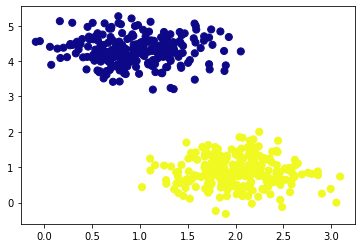

In [63]:
xfit = np.linspace(-1,3.5)
plt.scatter(m[:,0],m[:,1], c = n, s = 50, cmap = 'plasma')

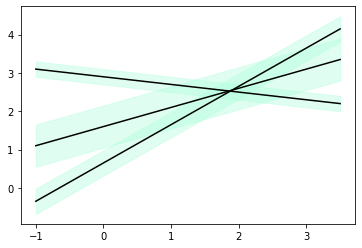

In [65]:
for p, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
        yfit = p * xfit + b
        plt.plot(xfit, yfit, '-k')
        plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='blue',
        color='#AFFEDC', alpha=0.4)

# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
gnb = GaussianNB()
mnb = MultinomialNB()
model_gnb = gnb.fit(x_train,y_train)
model_mnb = mnb.fit(x_train,y_train)

In [236]:
y_pred_gnb = model_gnb.predict(x_test)
models_accuracy.append(accuracy_score(y_test,y_pred_gnb)*100)
models_precision.append(precision_score(y_test,y_pred_gnb)*100)
models_recall.append(recall_score(y_test,y_pred_gnb)*100)
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[1147,  283],
       [  26,   39]])

In [237]:
y_pred_mnb = model_mnb.predict(x_test)
models_accuracy.append(accuracy_score(y_test,y_pred_mnb)*100)
models_precision.append(precision_score(y_test,y_pred_mnb)*100)
models_recall.append(recall_score(y_test,y_pred_mnb)*100)
cnf_matrix_mnb = confusion_matrix(y_test,y_pred_mnb)
cnf_matrix_mnb

array([[1428,    2],
       [  65,    0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



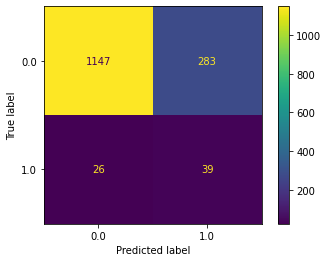

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



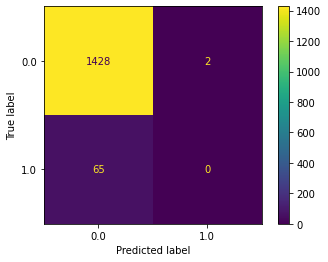

In [70]:
plot_confusion_matrix(model_gnb,x_test,y_test)  
plt.show()
plot_confusion_matrix(model_mnb,x_test,y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



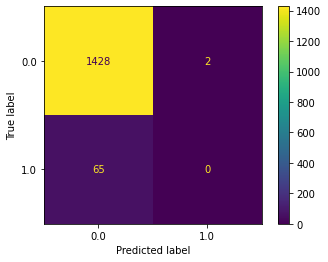

In [71]:
plot_confusion_matrix(model_mnb,x_test,y_test)  
plt.show()

# Comparing the models(Accuracy, recall, precision)

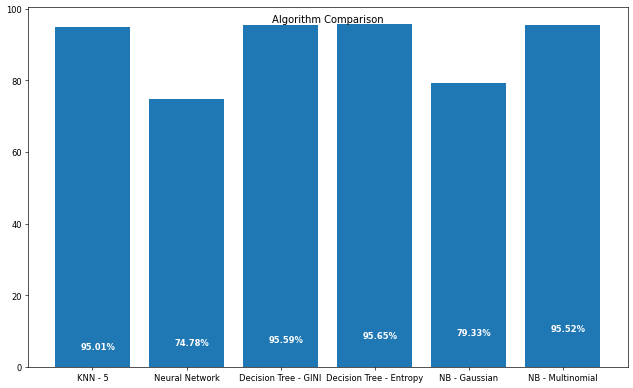

In [238]:
import matplotlib.pyplot as plt
names = []
names.append("KNN - 5")
names.append("Neural Network")
names.append("Decision Tree - GINI")
names.append("Decision Tree - Entropy")
names.append("NB - Gaussian")
names.append("NB - Multinomial")
fig = plt.figure(figsize = (10,6), dpi = 60)
fig.suptitle('Algorithm Comparison')
ax = fig.add_axes([0,0,1,1])
ax.bar(names,models_accuracy)
for i in range(len(models_accuracy)):
    ax.text(i-.125, i + 5, str(format((models_accuracy[i]),".2f")+"%"),
            color = 'white', fontweight = 'bold')
plt.show()

In [246]:
models_precision

[40.0, 9.375, 33.33333333333333, 0.0, 12.111801242236025, 0.0]

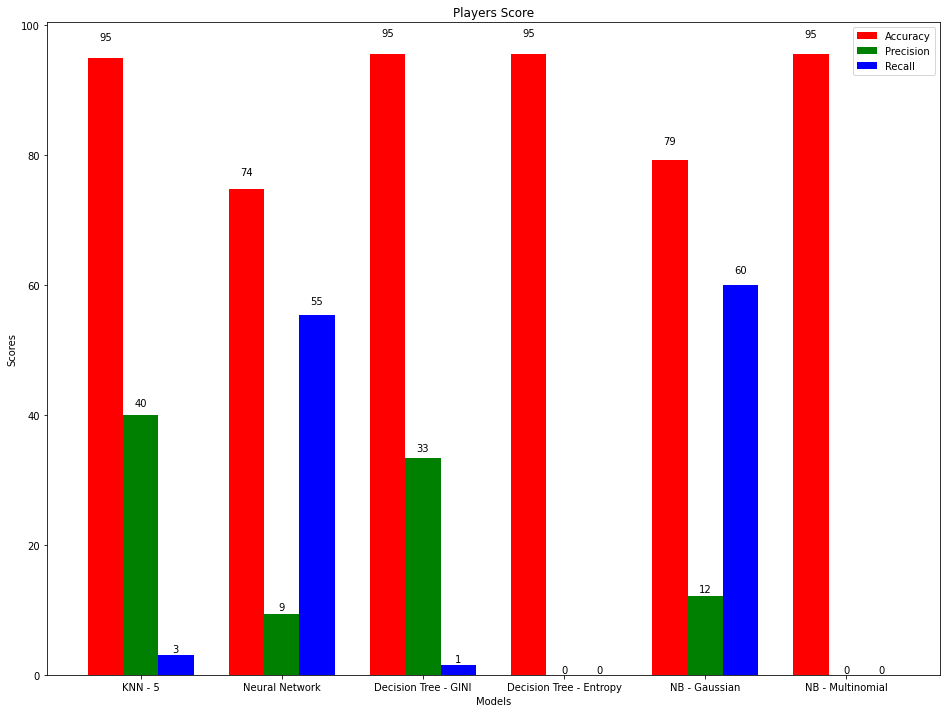

In [281]:
import matplotlib.pyplot as plt
import numpy as np

N = 6
ind = np.arange(N) 
width = 0.25

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111)

  
bar1 = ax.bar(ind, models_accuracy, width, color = 'r')
  
bar2 = ax.bar(ind+width, models_precision, width, color='g')
  
bar3 = ax.bar(ind+width*2, models_recall, width, color = 'b')
  

plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Players Score")

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( names )
#ax.legend((bar1, bar2, bar3), ('Accuracy', 'Precision', 'Recall') )


ax.legend( (bar1[0], bar2[0], bar3[0]), ('Accuracy', 'Precision', 'Recall') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.025*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

In [173]:
models_accuracy 

[95.00860585197934,
 74.78260869565217,
 95.58528428093645,
 95.65217391304348,
 79.33110367892976,
 95.51839464882943]